# import

In [36]:
import openpyxl
import math
import matplotlib.pyplot as plt
import numpy
from scipy.stats import expon
import random

# Загрузка данных из .xlsx

In [3]:
default_path = '3302_Kalugina_Sarzhevskiy.xlsx'

path = input('Введите путь к .xlsx таблице (оставьте пустым для загрузки из таблицы по умолчанию): ')

wb = openpyxl.load_workbook(default_path) if path == '' else openpyxl.load_workbook(path)
sh = wb.active

input_data = []

for i in range(1, 301):
    input_data.append(float(sh.cell(row=i, column=1).value))

if path == '':
    print(f"Загружена трасса из {len(input_data)} чисел из файла {default_path}")
else:
    print(f"Загружена трасса из {len(input_data)} чисел из файла {path}")

Введите путь к .xlsx таблице (оставьте пустым для загрузки из таблицы по умолчанию): 
Загружена трасса из 300 чисел из файла 3302_Kalugina_Sarzhevskiy.xlsx


# Оценки основных характеристик посдедовательности

In [17]:
student_test_coef = {
    0.90: 1.643,
    0.95: 1.960,
    0.99: 2.580
}

def compute_characteristics_for_n_values(n):
    expected_value = sum(input_data[:n]) / n
    print(f"Оценка математического ожидания для {n} элементов: {expected_value}")

    dispersion = sum([(x - expected_value)**2 for x in input_data[:n]]) / (n - 1)
    print(f"Оценка диперсии для {n} элементов: {dispersion}")

    standard_deviation = math.sqrt(dispersion)
    print(f"Оценка среднеквадратического отклонения для {n} элементов: {standard_deviation}")
    
    variation = standard_deviation / expected_value
    print(f"Оценка коэффициента вариации для {n} элементов: {variation}")
    
    epsilon_90 = student_test_coef[0.90] * standard_deviation
    print(f"Эпсилон 0.90 ({n} элементов): {epsilon_90}")
    
    epsilon_95 = student_test_coef[0.95] * standard_deviation
    print(f"Эпсилон 0.95 ({n} элементов): {epsilon_95}")
    
    epsilon_99 = student_test_coef[0.99] * standard_deviation
    print(f"Эпсилон 0.99 ({n} элементов): {epsilon_99}")
    
    return [expected_value, dispersion, standard_deviation, variation, epsilon_90, epsilon_95, epsilon_99]
    
c_10 = compute_characteristics_for_n_values(10)
print()
c_50 = compute_characteristics_for_n_values(50)
print()
c_100 = compute_characteristics_for_n_values(100)
print()
c_200 = compute_characteristics_for_n_values(200)
print()
c_300 = compute_characteristics_for_n_values(300)

# TODO: print table

Оценка математического ожидания для 10 элементов: 1.920856418997817
Оценка диперсии для 10 элементов: 15.251124970522158
Оценка среднеквадратического отклонения для 10 элементов: 3.905268873012735
Оценка коэффициента вариации для 10 элементов: 2.03308734291044
Эпсилон 0.90 (10 элементов): 6.416356758359924
Эпсилон 0.95 (10 элементов): 7.65432699110496
Эпсилон 0.99 (10 элементов): 10.075593692372857

Оценка математического ожидания для 50 элементов: 2.199855565563386
Оценка диперсии для 50 элементов: 15.765920806944548
Оценка среднеквадратического отклонения для 50 элементов: 3.970632293091939
Оценка коэффициента вариации для 50 элементов: 1.804951359193009
Эпсилон 0.90 (50 элементов): 6.523748857550055
Эпсилон 0.95 (50 элементов): 7.7824392944602
Эпсилон 0.99 (50 элементов): 10.244231316177203

Оценка математического ожидания для 100 элементов: 1.9333170603657206
Оценка диперсии для 100 элементов: 14.603477111238902
Оценка среднеквадратического отклонения для 100 элементов: 3.821449608

# График заданной последовательности

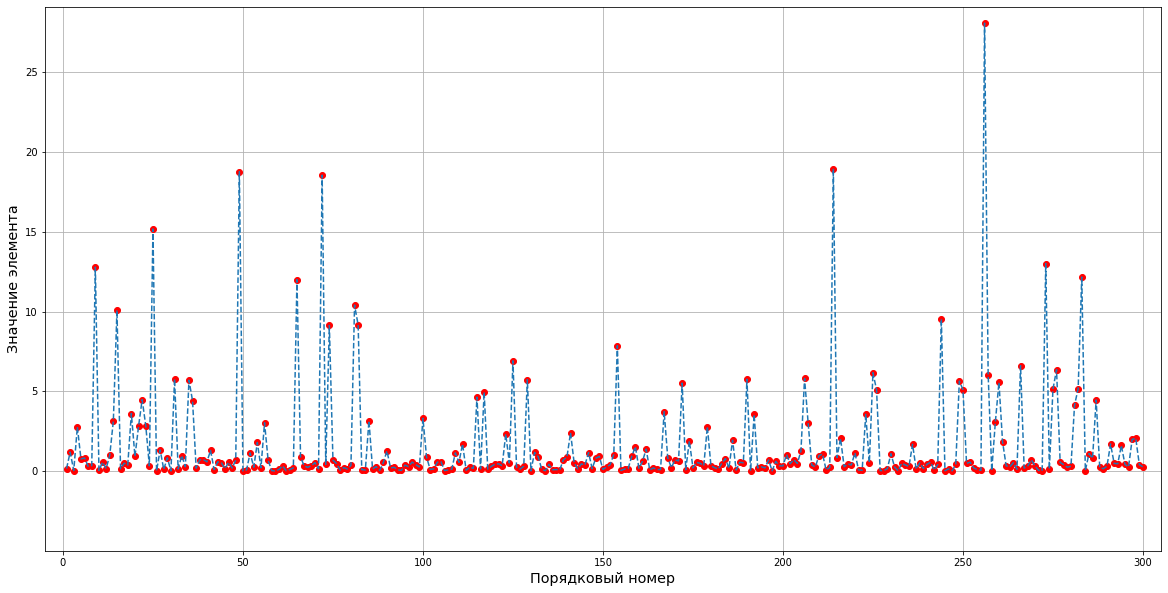

In [52]:
x_border = (-5, 305)
y_border = (min(input_data) - 5, max(input_data) + 1)

plt.figure(figsize=(20, 10))
plt.plot(range(1, 301), input_data, 'ro', range(1, 301), input_data, '--')

ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])

plt.ylabel('Значение элемента', fontsize='x-large')
plt.xlabel('Порядковый номер', fontsize='x-large')

plt.grid()
plt.show()

# Расчет коэффициента автокорреляции

In [54]:
def compute_autocorrelation(n):
    x_data = input_data[:(len(input_data) - n)]
    y_data = input_data[n:]
    
    m_1 = sum(x_data) / len(x_data)
    m_2 = sum(y_data) / len(y_data)
    
    autocorr_coef = sum([(x - m_1) * (y - m_2) for (x, y) in zip(x_data, y_data)]) / math.sqrt(sum([(x - m_1)**2 for x in x_data]) * sum([(y - m_2)**2 for y in y_data]))
    print(f"Коэффициент автокорреляции ({n}): {autocorr_coef}")
    
    return autocorr_coef

autocorr_coefs = []
for i in range(1, 11):
    autocorr_coefs.append(compute_autocorrelation(i))

Коэффициент автокорреляции (1): -0.0033663339856774502
Коэффициент автокорреляции (2): -0.01484969928254023
Коэффициент автокорреляции (3): -0.056866134871722054
Коэффициент автокорреляции (4): -0.014721206933041618
Коэффициент автокорреляции (5): -0.056271032132896415
Коэффициент автокорреляции (6): 0.03246459146705559
Коэффициент автокорреляции (7): 0.09593473151398874
Коэффициент автокорреляции (8): 0.0023855025346994365
Коэффициент автокорреляции (9): 0.02723066377808868
Коэффициент автокорреляции (10): 0.13285968235271267


# График коэффициентов автокорреляции

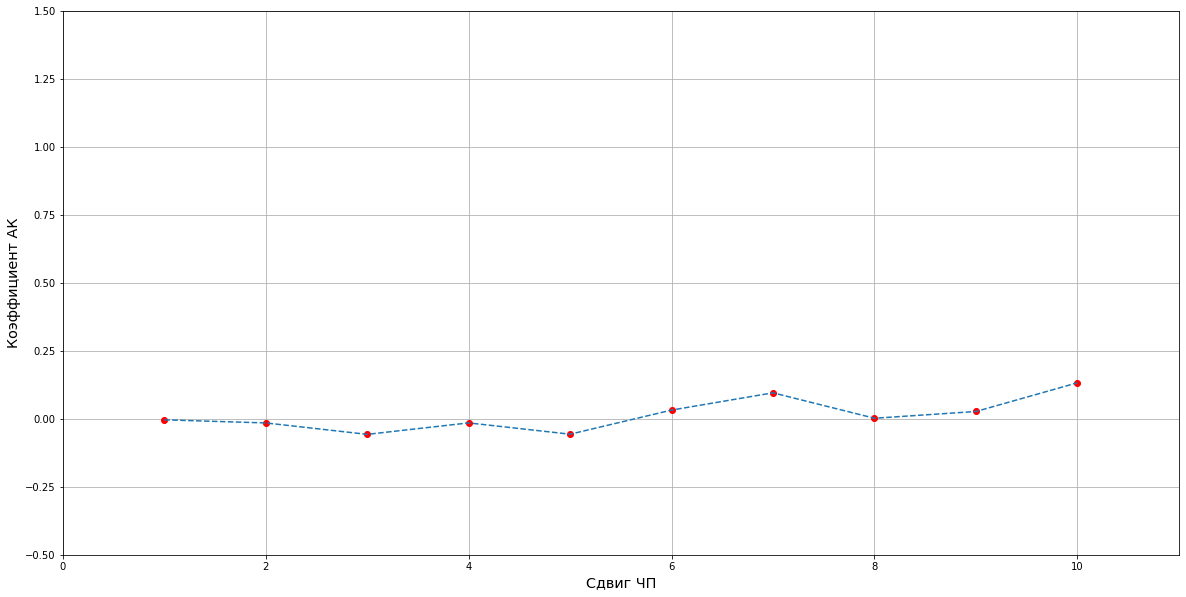

In [55]:
x_border = (0, 11)
y_border = (-0.5, 1.5)

a_c_original = [-0.0033663339856774502, -0.01484969928254023, -0.056866134871722054, -0.014721206933041618, -0.056271032132896415, 0.03246459146705559, 0.09593473151398874, 0.0023855025346994365, 0.02723066377808868, 0.13285968235271267]


plt.figure(figsize=(20, 10))
plt.plot(range(1, 11), autocorr_coefs, 'ro',
         #range(1, 11), a_c_original, 'yo',
         range(1, 11), autocorr_coefs, '--')
        #range(1, 11), a_c_original, '--')



ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([x_border[0], x_border[1], y_border[0], y_border[1]])
#plt.legend(('АК случайной последовательности', 'АК изначальной последовательности'), fontsize='x-large')
plt.ylabel('Коэффициент АК', fontsize='x-large')
plt.xlabel('Сдвиг ЧП', fontsize='x-large')

plt.grid()
plt.show()

# Гистограмма распределения частот

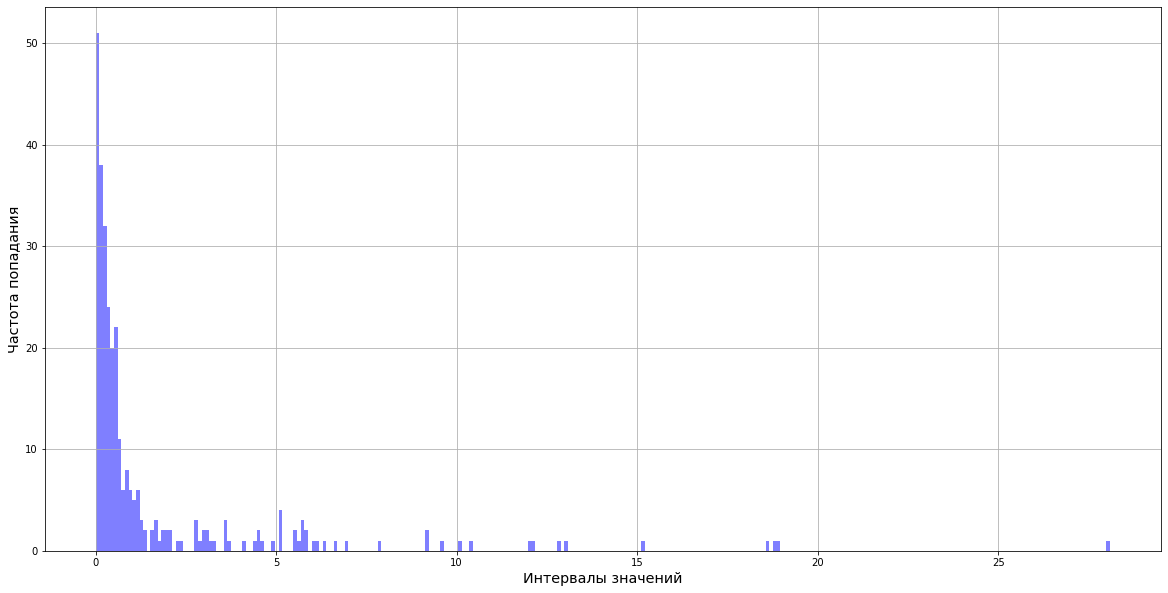

In [56]:
# TODO: find better way to compute num_intervals
interval_len = (3.5 * c_300[2])/(300**(1./3.)) # Scott's formula
num_intervals = int(max(input_data) / interval_len)
#num_intervals = 15
plt.figure(figsize=(20, 10))
n, bins, patches = plt.hist(input_data, num_intervals, facecolor='blue', alpha=0.5)


#print(n)
#print(bins)

plt.ylabel('Частота попадания', fontsize='x-large')
plt.xlabel('Интервалы значений', fontsize='x-large')

plt.grid()
plt.show()

# Генерация новой последовательности
Реализован только Эрланг

Таблицу нужно заранее создать

0.6989261223802621
1.0473688076535377
1.1303210557155894



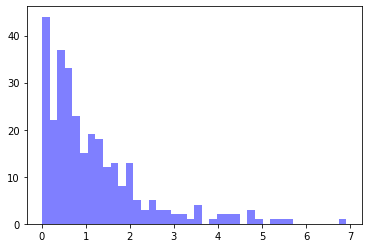

mean = 1.1782827363935273
3.141597705790053
1.2383771129801313
2.0327288959424594
0.5250021213933386
0.05235545636089571
0.48554584438855336
0.8227102889489764
0.8240766653132513
0.9716036601086215
0.5504137557161578
0.5228803041099129
0.29760850643909237
1.2026274361416858
0.3913021597309969
0.42839656321269903
1.2356496610359746
1.2269535838255883
0.4870823055640565
0.6187608093189176
2.2225048646931502
2.8812570898630625
0.18210978447945927
0.0992613805511697
0.9959676433699948
0.33834425222420317
4.473959611439824
0.5633891289654156
0.869910324336508
0.5052310164194032
0.4892310874430374
1.1356472676953424
0.09769022890116025
3.4765104935770332
3.0643563180139903
2.8301565675007745
0.07332691144807624
0.5006479920079797
1.4181707565765862
0.22778444257309097
0.09437585433325969
3.9263706042386453
0.5264419068755877
0.011193075206874074
0.3989523826514987
0.3297154607221872
0.7685706549213607
3.5646277339304264
1.8427801205671452
6.91687928522779
0.2658799375570399
0.983771819927490

In [67]:
def generate_erlang():
    k = int((1/c_300[3])**2)
    m = c_300[0]
    n = 300
    print(f"Генерирую распределние Эрланга {k}-го порядка с матожиданием {m} ({n} величин)")
    return numpy.random.gamma(k, m / k, n)

#result = generate_erlang()

def h2rnd(q, m1, m2, n):
    res = []
    for i in range(n):
        p = random.random()
        if p <= q:
            res.append(expon.rvs(scale=m1, size=1)[0])
        else:
            res.append(expon.rvs(scale=m2, size=1)[0])
    return res

def hyperexponential():
    n = len(input_data)
    v = c_300[3]
    q = (2 / (1 + v**2)) / 2
    t = sum([x**3 / n for x in input_data]) / n
    print(t)
    m1 = t * (1 + math.sqrt(((1 - q)/ 2*q) * (v**2 - 1)))
    m2 = t * (1 + math.sqrt(((q)/(2 * (1 - q))) * (v**2 - 1)))
    print(m1)
    print(m2)
    print()
    return h2rnd(q, m1, m2, n)


result = hyperexponential()

n, bins, patches = plt.hist(result, 40, facecolor='blue', alpha=0.5)
plt.show()

print(f"mean = {sum(result) / len(result)}")

for number in result:
    print(number)